# importing the MLBox

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

/home/datageek/anaconda2/lib/python2.7/site-packages/mlbox/preprocessing/drift/__init__.py:9: UserWarning: ipCluster is starting. Please wait 30 sec and check in terminal that 'the engines appear to have started successfully'.
  warnings.warn("ipCluster is starting. Please wait 30 sec and check in terminal that 'the engines appear to have started successfully'.")
Using Theano backend.
/home/datageek/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
paths = ["train.csv","test.csv"]
target_name = "SalePrice"

# reading and cleaning all files 

In [3]:
rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)


reading csv : train.csv ...
cleaning data...
CPU time: 0.323591947556 seconds

reading csv : test.csv ...
cleaning data...
CPU time: 0.171083211899 seconds

number of common features : 80

gathering and crunching for train and test datasets
reindexing for train and test datasets
dropping training duplicates
dropping constant variables on training set

number of categorical features : 43
number of numerical features : 37
number of training samples : 1460
number of test samples : 1459

Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

task : regression


In [4]:
dft = Drift_thresholder()
df = dft.fit_transform(df)


computing drifts...
CPU time: 1.03511095047 seconds

Top 10 drifts

('Id', 0.9996570644718793)
('GarageYrBlt', 0.52930157759352303)
('Exterior1st', 0.52586411001119482)
('TotalBsmtSF', 0.52389869237891595)
('2ndFlrSF', 0.52123329243075833)
('Exterior2nd', 0.52107292808122652)
('BsmtFullBath', 0.52018890605818879)
('GrLivArea', 0.5197186371334116)
('TotRmsAbvGrd', 0.5194699326175769)
('WoodDeckSF', 0.51865392689173118)

deleted variables : ['Id']

dumping drift coefficients into directory : save
drift coefficients dumped


# tuning

In [5]:
mape = make_scorer(lambda y_true, y_pred: 100*np.sum(np.abs(y_true-y_pred)/y_true)/len(y_true), greater_is_better=False, needs_proba=False)
opt = Optimiser(scoring = mape, n_folds = 3)

In [6]:
opt.evaluate(None, df)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'max_depth': -1, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'max_bin': 255, 'objective': 'regression', 'min_split_gain': 0, 'seed': 0, 'min_child_samples': 10, 'boosting_type': 'gbdt'}


MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -16.5501726299
VARIANCE : 2.00925690187 (fold 1 = -19.3633082808, fold 2 = -15.4905497623, fold 3 = -14.7966598466)
CPU time: 8.19659590721 seconds



-16.550172629917437

In [7]:
space = {
    
        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]}, 
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},    
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}
    
        }

best = opt.optimise(space, df,15)


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'threshold': 0.26531787335967333, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'regression', 'min_split_gain': 0, 'seed': 0, 'max_depth': 7, 'boosting_type': 'gbdt'}



/home/datageek/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -16.6000539505
VARIANCE : 1.95777785425 (fold 1 = -19.3293323726, fold 2 = -15.6386772607, fold 3 = -14.8321522183)
CPU time: 20.9097988605 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'threshold': 0.13175844100915654, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'regression', 'min_split_gain': 0, 'seed': 0, 'max_depth': 7, 'boosting_type': 'gbdt'}


MEAN SCORE : make_


MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -17.0509603977
VARIANCE : 1.99373044863 (fold 1 = -19.8347099396, fold 2 = -16.0470231453, fold 3 = -15.2711481081)
CPU time: 213.282745123 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'threshold': 0.05281239085991175, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'regression', 'min_split_gain': 0, 'seed': 0, 'max_depth': 4, 'boosting_type': 'gbdt'}


MEAN SCORE : mak


fitting the pipeline...
CPU time: 3.09728813171 seconds

dumping feature importances into directory : save


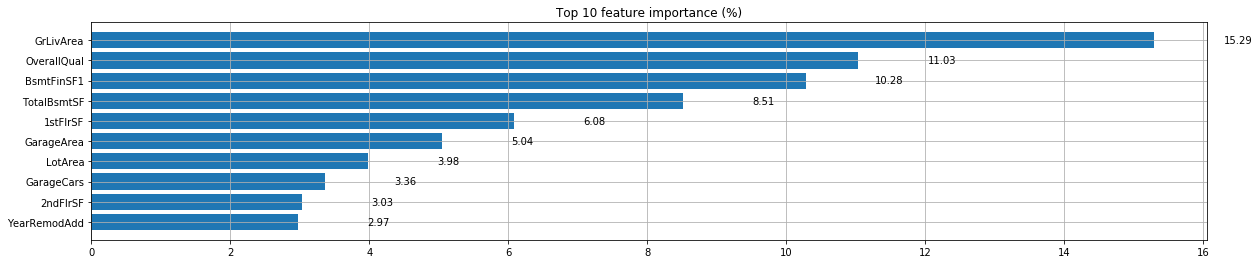


predicting...
CPU time: 0.354372024536 seconds

top 10 predictions :

   SalePrice_predicted
0        133447.309873
1        147302.419514
2        170916.513757
3        181202.179247
4        201168.127372
5        179089.236567
6        168791.083876
7        168273.419308
8        184957.206909
9        131798.328023

dumping predictions into directory : save


<mlbox.prediction.predictor.Predictor instance at 0x7feca16dbdd0>

In [9]:
prd = Predictor()
prd.fit_predict(best, df)